<a href="https://colab.research.google.com/github/WFVieira-hub/Met_Matematicos/blob/master/Tarefa_02_Met_Num_08_set_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [18]:
!git clone https://github.com/ucfilho/Disciplina_Metodos_Numericos_2020 #clonar do Github
%cd Disciplina_Metodos_Numericos_2020

fatal: destination path 'Disciplina_Metodos_Numericos_2020' already exists and is not an empty directory.
/content/Disciplina_Metodos_Numericos_2020/Disciplina_Metodos_Numericos_2020/Disciplina_Metodos_Numericos_2020


In [19]:
from GaussPivot import gauss

In [20]:
from GaussSeidel import gauss_seidel

In [21]:
from Jacobi import jacobi

In [22]:
from SystemSOR import SOR

/content/Disciplina_Metodos_Numericos_2020/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/Disciplina_Metodos_Numericos_2020/GaussSeidel.py:35: RuntimeWarning: overflow encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/Disciplina_Metodos_Numericos_2020/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/Disciplina_Metodos_Numericos_2020/SystemSOR.py:11: RuntimeWarning: overflow encountered in double_scalars
  x2[i]=(-a[i].dot(x2)+b[i])*w/a[i,i]+x2[i]
/content/Disciplina_Metodos_Numericos_2020/Jacobi.py:32: RuntimeWarning: overflow encountered in double_scalars
  sum += A[i,j]*x[j]
/content/Disciplina_Metodos_Numericos_2020/Jacobi.py:33: RuntimeWarning: overflow encountered in double_scalars
  xnew[i] = (f[i] - sum)/A[i,i]


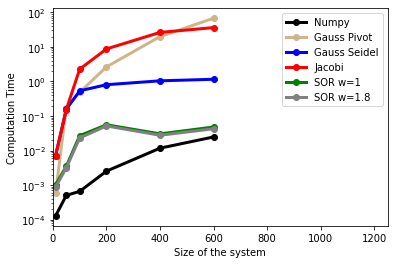

In [23]:
# size of the matrix to be calculated
SIZE = [10,50,100,200,400,600]

# create list
cpu_time_numpy = []
cpu_time_mycode = []
cpu_time_mycode1 = []
cpu_time_mycode2 = []
cpu_time_mycode3 = []
cpu_time_mycode4 = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  x0 = np.random.rand(size)
  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # mycode
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_mycode.append(time.clock()-t0)

   # mycode 1
  t0 = time.clock()
  x= gauss_seidel(A,f,x0)
  cpu_time_mycode1.append(time.clock()-t0)

  # mycode 2
  t0 = time.clock()
  x= jacobi(A,f,x0)
  cpu_time_mycode2.append(time.clock()-t0)

  # mycode 3
  t0 = time.clock()
  x= SOR(A,f,x0)
  cpu_time_mycode3.append(time.clock()-t0)

   # mycode 4
  t0 = time.clock()
  x= SOR(A,f,x0,w=1.8)
  cpu_time_mycode4.append(time.clock()-t0)


# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=3, color='black',label='Numpy')
plt.semilogy(SIZE,cpu_time_mycode,'o-',linewidth=3, color='tan',label='Gauss Pivot')
plt.semilogy(SIZE,cpu_time_mycode1,'o-',linewidth=3, color='blue',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_mycode2,'o-',linewidth=3, color='red',label='Jacobi')
plt.semilogy(SIZE,cpu_time_mycode3,'o-',linewidth=3, color='green',label='SOR w=1')
plt.semilogy(SIZE,cpu_time_mycode4,'o-',linewidth=3, color='gray',label='SOR w=1.8')
plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1250])
plt.legend(loc=1)
plt.show()